In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import vaep
from vaep.io import data_objects

from src.config import FNAME_C_PEPTIDES, FNAME_C_EVIDENCE, FNAME_C_PG, FNAME_C_GENES

FNAME_C_PEPTIDES, FNAME_C_EVIDENCE, FNAME_C_PG, FNAME_C_GENES

FOLDER_MQ_TXT_DATA = data\mq_out


(WindowsPath('data/processed/count_all_peptides.json'),
 WindowsPath('data/processed/count_all_evidences.json'),
 WindowsPath('data/processed/count_all_protein_groups.json'),
 WindowsPath('data/processed/count_all_genes.json'))

## Aggregated Peptides

In [2]:
peptide_counter = data_objects.PeptideCounter(FNAME_C_PEPTIDES)
N_SAMPLES = len(peptide_counter.loaded)

In [3]:
peptide_counter

PeptideCounter(fp_counter=data\processed\count_all_peptides.json)

In [4]:
peptide_counts = peptide_counter.get_df_counts()
# peptide_counts.index += 1 
peptide_counts.head()

,Sequence,counts,proportion
consecutive count,,,
0,YVELFLNSTAGASGGAYEHR,6,1.000
1,LIEECISQIVLHK,6,1.000
2,LCWFLDEAAAR,6,1.000
3,LCVQNSPQEAR,6,1.000
4,LCVPAMNVNDSVTK,6,1.000


In [5]:
peptide_counts.index.name

'consecutive count'

In [6]:
peptide_counts.describe(percentiles=np.linspace(0.1,1,10))

,counts,proportion
count,"78,073.000","78,073.000"
mean,2.745,0.457
std,1.640,0.273
min,1.000,0.167
10%,1.000,0.167
20%,1.000,0.167
30%,1.000,0.167
40%,2.000,0.333
50%,2.000,0.333
60%,3.000,0.500


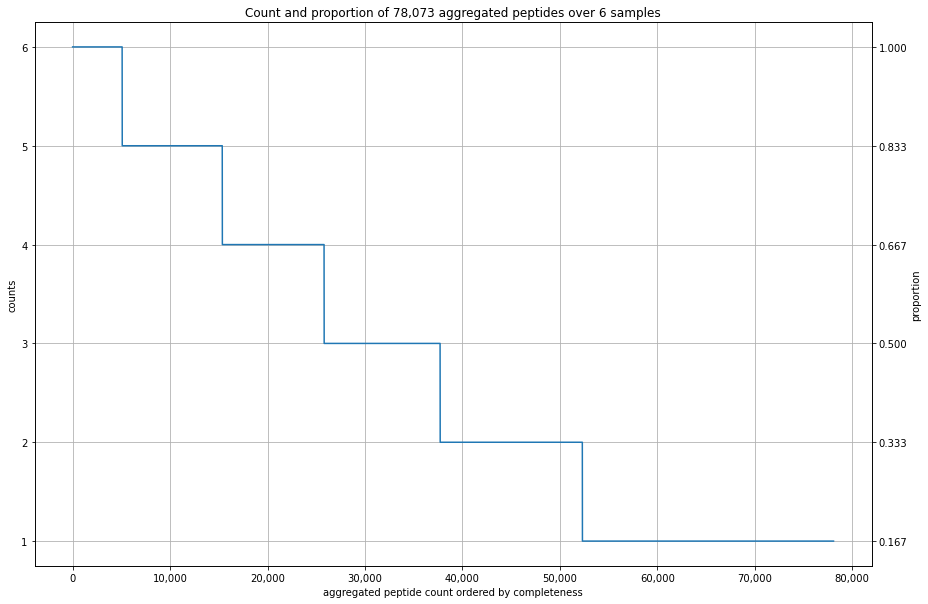

In [7]:
def plot_feat_counts(df_counts, feat_name, n_samples,
                     ax=None, figsize=(15, 10),
                     count_col='counts'):

    ax = df_counts[count_col].plot(
        figsize=figsize,
        ylabel='counts',
        xlabel=f'{feat_name} count ordered by completeness',
        title=f'Count and proportion of {len(df_counts):,d} {feat_name}s over {n_samples:,d} samples',
        grid=True,
        ax=ax)

    # default nearly okay, but rather customize to see minimal and maxium proportion
    # ax = df_counts['proportion'].plot(secondary_y=True, style='b')

    ax2 = vaep.plotting.add_prop_as_second_yaxis(ax=ax, n_samples=n_samples)
    ax2.set_ylabel('proportion')
    ax = vaep.plotting.format_large_numbers(ax=ax)
    return ax


ax = plot_feat_counts(
    peptide_counts, feat_name='aggregated peptide', n_samples=N_SAMPLES)


## Evidence - Peptides by charge and modifications



In [ ]:
evidence_counter = data_objects.EvidenceCounter(FNAME_C_EVIDENCE)
evidence_count = evidence_counter.get_df_counts()
evidence_count.head()

## Protein Groups

In [ ]:
pg_counter = data_objects.ProteinGroupsCounter(FNAME_C_PG)
pg_count = pg_counter.get_df_counts()
pg_count.head()

## Genes

In [ ]:
gene_counter = data_objects.GeneCounter(FNAME_C_GENES)
gene_count = gene_counter.get_df_counts()
gene_count.head() # remove NaN entry


In [ ]:
gene_count = gene_count.iloc[1:]
gene_count.head() 